In [1]:
# import zipfile
# with zipfile.ZipFile("data.zip","r") as zip_ref:
#     zip_ref.extractall(".")

In [2]:
!pip install timm
!pip install fastai

In [3]:
import timm
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from pathlib import Path
from fastai.vision.all import *
from fastcore.parallel import *

In [4]:
files = get_image_files("data")
files

(#11132) [Path('data/HVLA/17_3_1 | 11521-15360.jpg'),Path('data/HVLA/20_14_1 | 3841-7680.jpg'),Path('data/HVLA/22_13_2 | 69121-72960.jpg'),Path('data/HVLA/7_12_1 | 38401-42240.jpg'),Path('data/HVLA/2_7_1 | 19201-23040.jpg'),Path('data/HVLA/5_1_1 | 23041-26880.jpg'),Path('data/HVLA/23_12_2 | 1-3840.jpg'),Path('data/HVLA/12_2_1 | 3841-7680.jpg'),Path('data/HVLA/14_15_1 | 30721-34560.jpg'),Path('data/HVLA/14_15_1 | 7681-11520.jpg')...]

(224, 224)


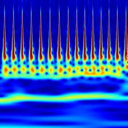

In [5]:
img = PILImage.create(files[0])
print(img.size)
img.to_thumb(128)

In [6]:
from fastcore.parallel import *

def f(o): return PILImage.create(o).size
sizes = parallel(f, files, n_workers=8)
pd.Series(sizes).value_counts()

(224, 224)    11132
dtype: int64

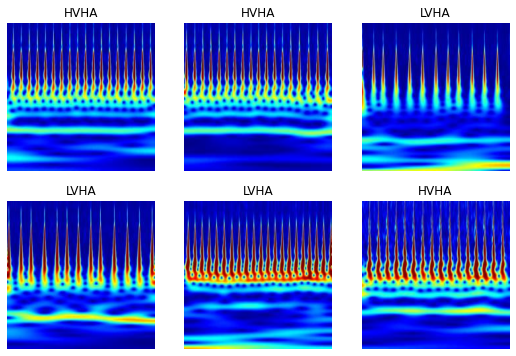

In [7]:
dls = ImageDataLoaders.from_folder("data", valid_pct=0.2, seed=42)

dls.show_batch(max_n=6)

In [8]:
learn = vision_learner(dls, 'levit_384', metrics=accuracy, path='.').to_fp16()

/usr/local/lib/python3.9/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


SuggestedLRs(valley=0.00363078061491251, slide=0.005248074419796467)

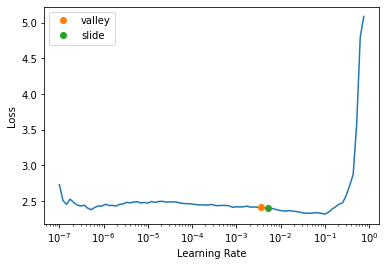

In [9]:
learn.lr_find(suggest_funcs=(valley, slide))

In [10]:
learn.fit_one_cycle(10, 0.01)

epoch,train_loss,valid_loss,accuracy,time
0,1.765758,nan,0.440252,01:35
1,1.404341,nan,0.467206,01:35
2,1.321320,nan,0.492812,01:36
3,1.210137,nan,0.471249,01:36
4,1.113907,nan,0.501348,01:36
5,1.015191,nan,0.538634,01:36
6,0.910932,nan,0.539533,01:36
7,0.815311,nan,0.553459,01:36
8,0.718974,nan,0.560198,01:36
9,0.654175,nan,0.554807,01:36
